In [38]:
import datetime

from numba import jit, njit, prange
from numba import int32

import numpy as np
import xarray as xr

from scipy.special import exp1

import matplotlib.pyplot as plt

In [110]:
def solve_qian(xiN=161,zetaN=80,tauN=32,sN=1999,alpha=3,U=1,L=1):

    print('Initialising')

    # Time interval
    delTau = 2*np.pi/tauN
    delS = 1/sN
    delZeta = 4/zetaN
    
    # Initialise solution arrays
    psi = np.zeros((xiN,zetaN,tauN), dtype=np.complex64)
    u = np.zeros((xiN,zetaN,tauN), dtype=np.complex64)
    w = np.zeros((xiN,zetaN,tauN), dtype=np.complex64)

    # Initialise domains
    xi = np.linspace(-2,2,xiN, dtype=np.float64)
    # Dont start at zero as exponential integral not defined there
    zeta = np.arange(delZeta,4+delZeta,delZeta, dtype=np.float64)
    tau = np.arange(0,2*np.pi,delTau, dtype=np.float64)
    s = np.arange(delS,1,delS, dtype=np.float64)  

    print('Integrating')
    psi, u, w = integrate_qian(xi,zeta,tau,s,alpha,U,L)

#     ds = xr.Dataset({'psi':(('tau','zeta','xi'),psi),
#                      'u':(('tau','zeta','xi'),u),
#                      'w':(('tau','zeta','xi'),w)},
#                     {'tau': tau, 'zeta':zeta, 'xi':xi})

#     print('Saving')
#     now = str(datetime.datetime.now())[0:-7]
#     now=now.replace('-', '').replace(':', '').replace(' ', '_')
#     ds.to_netcdf('../datasets/rotunno_case_2_{}.nc'.format(now),
#                  encoding={'psi':{'zlib':True, 'complevel':9},
#                            'u':{'zlib':True, 'complevel':9},
#                            'w':{'zlib':True, 'complevel':9}})
    return psi, u, w

# @jit(parallel=True)
def integrate_qian(xi,zeta,tau,s,alpha,U,L):
    psi = [np.zeros((tau.size, zeta.size, xi.size), dtype=np.complex64) 
           for i in range(3)]
    u = [np.zeros((tau.size, zeta.size, xi.size), dtype=np.complex64) 
         for i in range(3)]
    w = [np.zeros((tau.size, zeta.size, xi.size), dtype=np.complex64) 
         for i in range(3)]
            
    u3a_ig = np.zeros(s.size, dtype=np.complex64)
    u3b_ig = np.zeros(s.size, dtype=np.complex64)
    
    # Define alternative domains
    theta = calc_theta(s,alpha=3)
    k = calc_k(theta,U)
    
    # Perform numerical integration
    for i in prange(xi.size):
        for j in range(zeta.size):
            for l in range(tau.size):
                
                # Calc psi1
                
                # Calc psi2
                
                # Calc psi3
                
                # Calc u1
                
                # Calc u2
                
                # Calc u3
                u3a_ig = calc_u3a(xi[i],zeta[j],tau[l],theta,U,L)
                u3b_ig = calc_u3b(xi[i],zeta[j],tau[l],s,alpha,U,L)
                
#                 import pdb 
#                 pdb.set_trace()
            
#                 u3a_ig = u3a_ig[~np.isnan(u3a_ig)]
#                 theta_u3a_ig = theta[~np.isnan(u3a_ig)]
                
#                 u3b_ig = u3b_ig[~np.isnan(u3a_ig)]
#                 s_u3b_ig = s[~np.isnan(u3b_ig)]
                
#                 u3a = np.trapz(theta_u3a_ig,u3a_ig)
#                 u3b = np.trapz(s_u3b_ig,u3b_ig)

                u3a = np.trapz(theta,u3a_ig)
                u3b = np.trapz(s,u3b_ig)

                u3c = (-1j/(2*np.pi)
                       *calc_C3(xi[i],tau[l],calc_k(0,U),U,L)
                       *exp1(-1j*zeta[j]/U))              

                
                u[2][l,j,i] = u3a+u3b+u3c
                

                
                # Calc w1
                
                # Calc w2
                
                # Calc w3
                

    return psi, u, w

@jit(parallel=True)
def calc_u3a(xi,zeta,tau,theta,U,L):
    u3a = (-U/(2*np.pi)*calc_C3(xi,tau,calc_k(theta,U),U,L)
           *np.exp(-zeta)*np.cos(theta))
    return u3a

@jit(parallel=True)
def calc_u3b(xi,zeta,tau,s,alpha,U,L):
    k = calc_k(calc_theta(s,alpha=alpha),U)
    k_0 = calc_k(0,U)
    theta = calc_theta(s, alpha=alpha)
    u3b = (-1j/(2*np.pi)*(calc_C3(xi,tau,k,U,L)-calc_C3(xi,tau,k_0,U,L))
           *np.exp(1j*zeta/(U*np.sin(theta)))*(1/np.tan(theta))
           *alpha*s**(alpha-1)*np.pi/2)
    return u3b          
    
@jit(parallel=True)
def calc_C3(xi,tau,k,U,L):
    C3 = k**2*np.exp(-k*L)*np.exp(1j*(k*xi-tau))/(k**2+(U*k-1)**2)
    return C3

@jit(parallel=True)
def calc_theta(s,alpha=3):
    theta = (np.pi/2)*s**alpha
    return theta
    
@jit(parallel=True)
def calc_k(theta,U):
    k = U/(1-np.sin(theta))
    return k

In [155]:
tp, tu, tw = solve_qian(xiN=41, zetaN=21, tauN=16, sN=2000, U=3)

Initialising
Integrating


/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2784: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


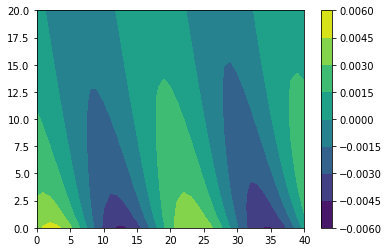

In [165]:
plt.contourf(tu[2][0])
plt.colorbar()